Things to consider:

* Structure of true system known or not

* Cost of intervention (look at outcome under different cost per action scenarios)

* Proportion of variables in system that are observed

* Must ensure that results are reproducible (work out consistent random seed)

In [1]:
import datetime
import itertools
import pandas as pd
from matplotlib import pyplot as plt
from true_systems.mammonet_breast_cancer_diagnosis import mammonet_system
import utils

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/josephbolton/python_virtual_envs/base_experimentation_env_v2/lib/python3.10/site-packages/pgmpy/utils/mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(
/Users/josephbolton/python_virtual_envs/base_experimentation_env_v2/lib/python3.10/site-packages/pgmpy/utils/mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
  warn(


  0%|          | 0/25 [00:00<?, ?it/s]

/Users/josephbolton/python_virtual_envs/base_experimentation_env_v2/lib/python3.10/site-packages/pgmpy/utils/mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(
/Users/josephbolton/python_virtual_envs/base_experimentation_env_v2/lib/python3.10/site-packages/pgmpy/utils/mathext.py:83: UserWarning: Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
  warn(


In [2]:
true_systems_dict = {
    "mammonet": mammonet_system,
}

In [3]:
# create all scenarios
true_systems = true_systems_dict.keys()
cost_per_intervention = [0] # [0,0.1]
true_system_structure_known = ["yes"] #["yes","no"]
proportion_of_variables_observed = [1.0] #[1.0, 0.75, 0.5]
all_scenario_variables = [
    true_systems,
    cost_per_intervention,
    true_system_structure_known,
    proportion_of_variables_observed,
]
all_scenarios = list(itertools.product(*all_scenario_variables))
cntr = 0
for scenario in all_scenarios:
    cntr += 1
    print(f"scenario {cntr}: true_system={scenario[0]}, cost_per_intervention={scenario[1]} true_system_structure_known={scenario[2]} proportion_of_variables_observed={scenario[3]}")

scenario 1: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=1.0



        System Name:                    MammoNet
        System Source:                  [paper] Construction of a Bayesian Network for Mammographic Diagnosis of Breast Cancer Kahn Jr et al. (1996)
        Number of Variables in System:  25
        Controllable Variables:         ['calcification', 'architectural_distortion', 'age_at_1st_live_birth', 'mass_location']
        Outcome Variable(s):            ['breast_cancer']
        


<Figure size 500x500 with 0 Axes>

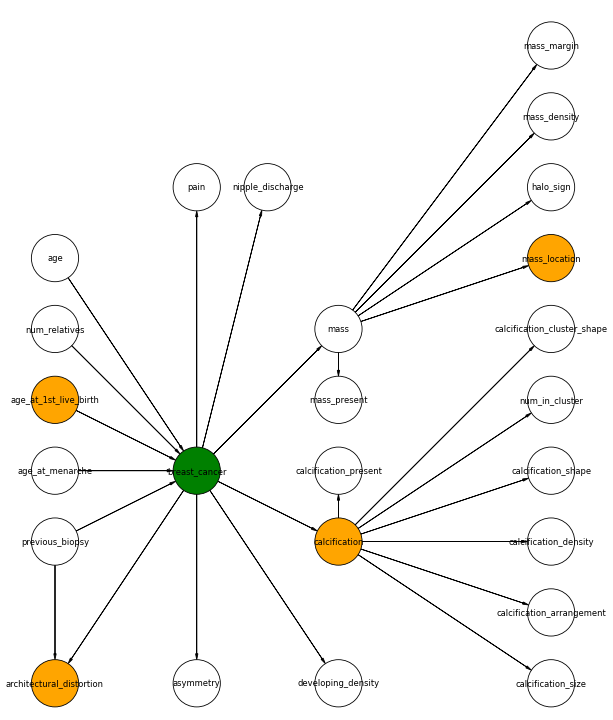

In [4]:
# have a look at the available systems
for system_name in true_systems_dict:    
    print(
        f"""
        System Name:                    {true_systems_dict[system_name].system_name}
        System Source:                  {true_systems_dict[system_name].system_source}
        Number of Variables in System:  {true_systems_dict[system_name].n_vars_in_system}
        Controllable Variables:         {true_systems_dict[system_name].can_control_varnames}
        Outcome Variable(s):            {true_systems_dict[system_name].outcome_varnames}
        """
    )
    
    plt.figure(figsize=(5,5))
    true_systems_dict[system_name].daft_model.render(dpi=60)
    plt.show()

In [10]:
# run scenarios and store results
scenario_counter = 0
for scenario in all_scenarios:
    print(f"started scenario {scenario_counter+1} of {len(all_scenarios)}----------------------------------------------------------------")
    print(f"    start time: {datetime.datetime.now().strftime('%H:%M:%S (%Y-%m-%d)')}")
    true_system_name=scenario[0]
    cost_per_intervention=scenario[1] 
    true_system_structure_known=scenario[2] 
    proportion_of_variables_observed=scenario[3]
    print(f"""    
    true_system_name                    {true_system_name}
    cost_per_intervention               {cost_per_intervention}
    true_system_structure_known         {true_system_structure_known}
    proportion_of_variables_observed    {proportion_of_variables_observed}
    """
    )

    true_system = true_systems_dict[true_system_name]
    print("    fitting CatBoost model...")
    utils.fit_catboost_binary_classifier(
        X_df=true_system.model_train_data.drop(true_system.outcome_varnames, axis=1),
        y_vec=true_system.model_train_data[true_system.outcome_varnames[0]],
        verbose=False,
    )
    print("    ...done")

    print(f"\n    COMPLETED scenario {scenario_counter+1} of {len(all_scenarios)}")
    print(f"    end time: {datetime.datetime.now().strftime('%H:%M:%S (%Y-%m-%d)')}")
    print()
    scenario_counter += 1


started scenario 1 of 1----------------------------------------------------------------
    start time: 15:56:43 (2023-02-27)
    
    true_system_name                    mammonet
    cost_per_intervention               0
    true_system_structure_known         yes
    proportion_of_variables_observed    1.0
    
    fitting CatBoost model...
    ...done
    COMPLETED scenario 1 of 1
    end time: 15:56:46 (2023-02-27)



In [6]:
true_system.model_train_data[true_system.outcome_varnames[0]]

0      yes
1       no
2      yes
3      yes
4      yes
      ... 
995     no
996    yes
997     no
998     no
999     no
Name: breast_cancer, Length: 1000, dtype: object